In [23]:
import os
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import cv2 # To do some image operations
import pandas as pd


In [32]:
#Gathering data set
mnist = tf.keras.datasets.mnist
# Split the data into training sets => Two tuples 1-> training data set  2-> testing data set
(x_train , y_train) ,(x_test , y_test) = mnist.load_data()

#convert data type from fload64 to float 32
#Normalize its value between 0 to 1 instead 0 to 255 for to be faster

x_train , x_test = x_train / 255.0 , x_test / 255.0   #255 pixel 
print("shape of x_train" , x_train.shape)
print("shape of x_test" , x_test.shape)

#60000 the numnber of input , each image has 28 * 28 pixel

shape of x_train (60000, 28, 28)
shape of x_test (10000, 28, 28)


In [34]:
#Bulding ANN Model
model = tf.keras.models.Sequential([
    # Flatting is coonverting the data into a 1-dimensional
    # array for inputting it it the next layer
    
    tf.keras.layers.Flatten(input_shape = (28 , 28)),
    tf.keras.layers.Dense(128 , activation = 'relu'), #AS all layers is densely connected so we must use dense layer type
    tf.keras.layers.Dropout(0.2), # By dropping unit out , we temporarily removing it from the nerwork with all its incoming and outgoing connections
    tf.keras.layers.Dense(10 , activation  = 'softmax') # number of category is 10 , must use function 'softmax' for image classification
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile & Train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #Calculate how often predections equal labels

In [39]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10) # We use a validation data as a  testing data also
                                                                             

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2918 - accuracy: 0.9145 - val_loss: 0.1402 - val_accuracy: 0.9580
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1392 - accuracy: 0.9586 - val_loss: 0.1029 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1050 - accuracy: 0.9684 - val_loss: 0.0845 - val_accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0882 - accuracy: 0.9730 - val_loss: 0.0760 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0738 - accuracy: 0.9769 - val_loss: 0.0782 - val_accuracy: 0.9757
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0658 - accuracy: 0.9789 - val_loss: 0.0789 - val_accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0586 - accuracy: 0.9810 - val_loss: 0.0745 - val_accuracy:

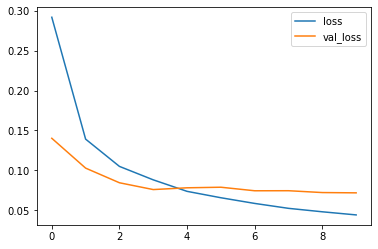

In [40]:
# Ploting loass per iteration
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss') #Valisdation loss plot
plt.legend()

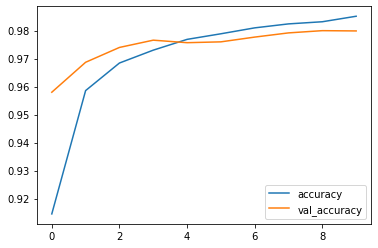

In [41]:
#Plotting Accuracy per iteration
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

In [42]:
#Model evaluation
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 828us/step - loss: 0.0719 - accuracy: 0.9799
[0.07189978659152985, 0.9799000024795532]


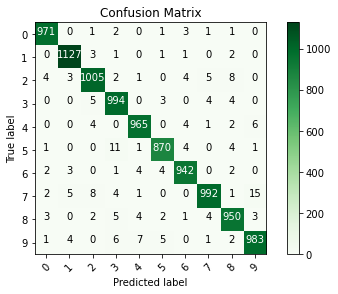

In [53]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Greens):


  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

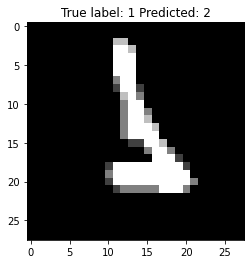

In [44]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));